In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def calc_confint(mu, sigma, n=20, alpha=0.05):
    t = stats.t.ppf(1 - alpha/2, n-1)
    delta = t * sigma / np.sqrt(n)
    return (mu-delta, mu+delta)

In [95]:
linucb_means = pd.read_csv('linucb_results_supervised.csv')
linucb_stds = pd.read_csv('linucb_results_supervised_std.csv')
ts_means = pd.read_csv('ts_results.csv')
ts_stds = pd.read_csv('ts_results_std.csv')
eg_means = pd.read_csv('egreedy_results.csv')
eg_stds = pd.read_csv('egreedy_results_std.csv')

In [96]:
compare_acc = pd.DataFrame({
    "t": linucb_means['t'],
    "LinUCB": linucb_means['cumulative_accuracy'],
    "Fixed Baseline": linucb_means['cumulative_fixed_baseline_accuracy'],
    "Clinical Baseline": linucb_means['cumulative_clinical_baseline_accuracy'],
    "Supervised Bandit": linucb_means['cumulative_supervised_accuracy'],
    "Thompson Sampling": ts_means['cumulative_accuracy'],
    r"$\epsilon$-greedy": eg_means['cumulative_accuracy']
})

compare_acc['linucb_confint'] = compare_acc.apply(lambda x: calc_confint(x['LinUCB'], linucb_stds['cumulative_accuracy'].values[int(x['t'])]), axis=1)
compare_acc['fixed_confint'] = compare_acc.apply(lambda x: calc_confint(x['Fixed Baseline'], linucb_stds['cumulative_fixed_baseline_accuracy'].values[int(x['t'])]), axis=1)
compare_acc['clinical_confint'] = compare_acc.apply(lambda x: calc_confint(x['Clinical Baseline'], linucb_stds['cumulative_clinical_baseline_accuracy'].values[int(x['t'])]), axis=1)
compare_acc['supervised_confint'] = compare_acc.apply(lambda x: calc_confint(x['Supervised Bandit'], linucb_stds['cumulative_supervised_accuracy'].values[int(x['t'])]), axis=1)
compare_acc['ts_confint'] = compare_acc.apply(lambda x: calc_confint(x['Thompson Sampling'], ts_stds['cumulative_accuracy'].values[int(x['t'])]), axis=1)
compare_acc['eg_confint'] = compare_acc.apply(lambda x: calc_confint(x[r"$\epsilon$-greedy"], eg_stds['cumulative_accuracy'].values[int(x['t'])]), axis=1)

In [97]:
compare_reg = pd.DataFrame({
    "t": linucb_means['t'],
    "LinUCB": linucb_means['cumulative_regret'],
    "Fixed Baseline": linucb_means['cumulative_fixed_baseline_regret'],
    "Clinical Baseline": linucb_means['cumulative_clinical_baseline_regret'],
    "Supervised Bandit": linucb_means['cumulative_supervised_regret'],
    "Thompson Sampling": ts_means['cumulative_regret'],
    r"$\epsilon$-greedy": eg_means['cumulative_regret']
})

compare_reg['linucb_confint'] = compare_reg.apply(lambda x: calc_confint(x['LinUCB'], linucb_stds['cumulative_regret'].values[int(x['t'])]), axis=1)
compare_reg['fixed_confint'] = compare_reg.apply(lambda x: calc_confint(x['Fixed Baseline'], linucb_stds['cumulative_fixed_baseline_regret'].values[int(x['t'])]), axis=1)
compare_reg['clinical_confint'] = compare_reg.apply(lambda x: calc_confint(x['Clinical Baseline'], linucb_stds['cumulative_clinical_baseline_regret'].values[int(x['t'])]), axis=1)
compare_reg['supervised_confint'] = compare_reg.apply(lambda x: calc_confint(x['Supervised Bandit'], linucb_stds['cumulative_supervised_regret'].values[int(x['t'])]), axis=1)
compare_reg['ts_confint'] = compare_reg.apply(lambda x: calc_confint(x['Thompson Sampling'], ts_stds['cumulative_regret'].values[int(x['t'])]), axis=1)
compare_reg['eg_confint'] = compare_acc.apply(lambda x: calc_confint(x[r"$\epsilon$-greedy"], eg_stds['cumulative_accuracy'].values[int(x['t'])]), axis=1)

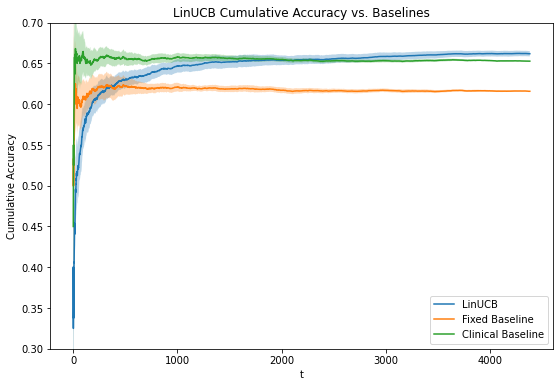

In [90]:
fig, ax = plt.subplots(figsize=(9,6))

compare_acc['LinUCB'].plot(ax=ax, ylim=(0.3, 0.7))
ax.fill_between(compare_acc.index, compare_acc['linucb_confint'].apply(lambda x: x[0]), compare_acc['linucb_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_acc['Fixed Baseline'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_acc['fixed_confint'].apply(lambda x: x[0]), compare_acc['fixed_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_acc['Clinical Baseline'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_acc['clinical_confint'].apply(lambda x: x[0]), compare_acc['clinical_confint'].apply(lambda x: x[1]), alpha=0.3)

ax.set_title('LinUCB Cumulative Accuracy vs. Baselines')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative Accuracy')
ax.legend(loc='lower right')

fig.get_figure().savefig('part2_acc.pdf')

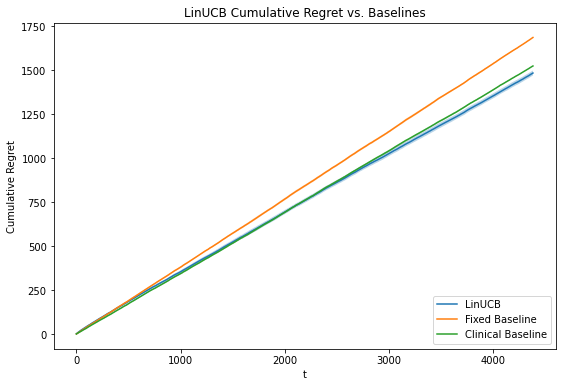

In [91]:
fig, ax = plt.subplots(figsize=(9,6))

compare_reg['LinUCB'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_reg['linucb_confint'].apply(lambda x: x[0]), compare_reg['linucb_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_reg['Fixed Baseline'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_reg['fixed_confint'].apply(lambda x: x[0]), compare_reg['fixed_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_reg['Clinical Baseline'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_reg['clinical_confint'].apply(lambda x: x[0]), compare_reg['clinical_confint'].apply(lambda x: x[1]), alpha=0.3)

ax.set_title('LinUCB Cumulative Regret vs. Baselines')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative Regret')
ax.legend(loc='lower right')

fig.get_figure().savefig('part2_reg.pdf')

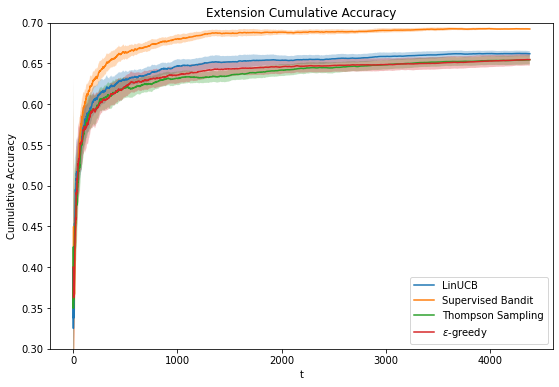

In [102]:
fig, ax = plt.subplots(figsize=(9,6))


compare_acc['LinUCB'].plot(ax=ax, ylim=(0.3, 0.7))
ax.fill_between(compare_acc.index, compare_acc['linucb_confint'].apply(lambda x: x[0]), compare_acc['linucb_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_acc['Supervised Bandit'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_acc['supervised_confint'].apply(lambda x: x[0]), compare_acc['supervised_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_acc['Thompson Sampling'].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_acc['ts_confint'].apply(lambda x: x[0]), compare_acc['ts_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_acc["$\epsilon$-greedy"].plot(ax=ax)
ax.fill_between(compare_acc.index, compare_acc['eg_confint'].apply(lambda x: x[0]), compare_acc['eg_confint'].apply(lambda x: x[1]), alpha=0.3)

ax.set_title('Extension Cumulative Accuracy')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative Accuracy')
ax.legend(loc='lower right')

fig.get_figure().savefig('part3_acc.pdf')

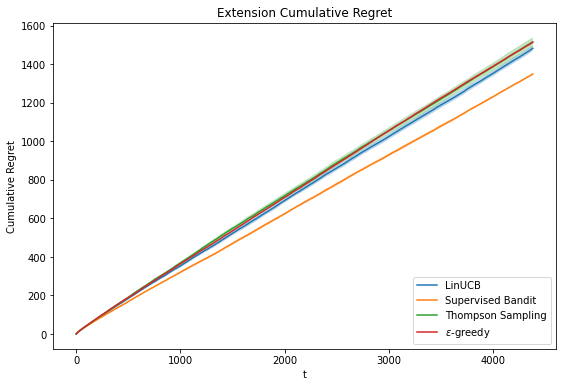

In [103]:
fig, ax = plt.subplots(figsize=(9,6))


compare_reg['LinUCB'].plot(ax=ax)
ax.fill_between(compare_reg.index, compare_reg['linucb_confint'].apply(lambda x: x[0]), compare_reg['linucb_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_reg['Supervised Bandit'].plot(ax=ax)
ax.fill_between(compare_reg.index, compare_reg['supervised_confint'].apply(lambda x: x[0]), compare_reg['supervised_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_reg['Thompson Sampling'].plot(ax=ax)
ax.fill_between(compare_reg.index, compare_reg['ts_confint'].apply(lambda x: x[0]), compare_reg['ts_confint'].apply(lambda x: x[1]), alpha=0.3)

compare_reg["$\epsilon$-greedy"].plot(ax=ax)
ax.fill_between(compare_reg.index, compare_reg['eg_confint'].apply(lambda x: x[0]), compare_reg['eg_confint'].apply(lambda x: x[1]), alpha=0.3)

ax.set_title('Extension Cumulative Regret')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative Regret')
ax.legend(loc='lower right')

fig.get_figure().savefig('part3_reg.pdf')